# Unsupervised Learning on Country Data

- Objective is to categorise the countries using socio-economic and health factors that determine the overall development of the country.
- HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.
- HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. 
- Categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then suggest the countries which the CEO needs to focus on the most.

Bellow there's a summary with the description of each variable of the dataset:

| Variable | Description|
|:------:|:------:|
| country | Name of the country|
| child_mort | Death of children under 5 years of age per 1000 live births|
| exports | Exports of goods and services per capita. Given as percentage of the GDP per capita |
| health | Total health spending per capita. Given as percentage of GDP per capita |
| imports | Imports of goods and services per capita. Given as percentage of the GDP per capita|
| income | Net income per person |
| inflation | The measurement of the annual growth rate of the Total GDP|
| life_expec | The average number of years a new born child would live if the current mortality patterns are to remain the same|
| total_fer | The number of children that would be born to each woman if the current age-fertility rates remain the same.|
| gdpp | The GDP per capita. Calculated as the Total GDP divided by the total population.|

For more information, use the [link](https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data) that redirects to the Kaggle's Page.

## Objective

Test three different clustering algorithms to select the best cluestering model in order to select the most vulnerable countries based on the metrics available on the dataset.

Models:
- DBSCAN
- Agglomerative Clustering
- KMeans

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

from sklearn.preprocessing import FunctionTransformer, StandardScaler, MinMaxScaler, Normalizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
import plotly.express as px

## Data Cleaning and Feature Engineering

In [3]:
data = pd.read_csv('data/Country-data.csv')
data.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


As shown above, there are 167 entries separated between 10 columns and there are no null values in the entire dataset. There are 1 column with "object" dtype, 7 columns with "int64" as dtype and 2 columns with dtype "int64".

In [18]:
len(data.country.unique())

167

There are 167 unique countries, so, there is one entry for each country with no duplicates.

In [19]:
numeric = data.columns[1:]
data[numeric].describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

There is a large range of values throughout all variables, which might indicate that some variables doesn't have a normal distribution.

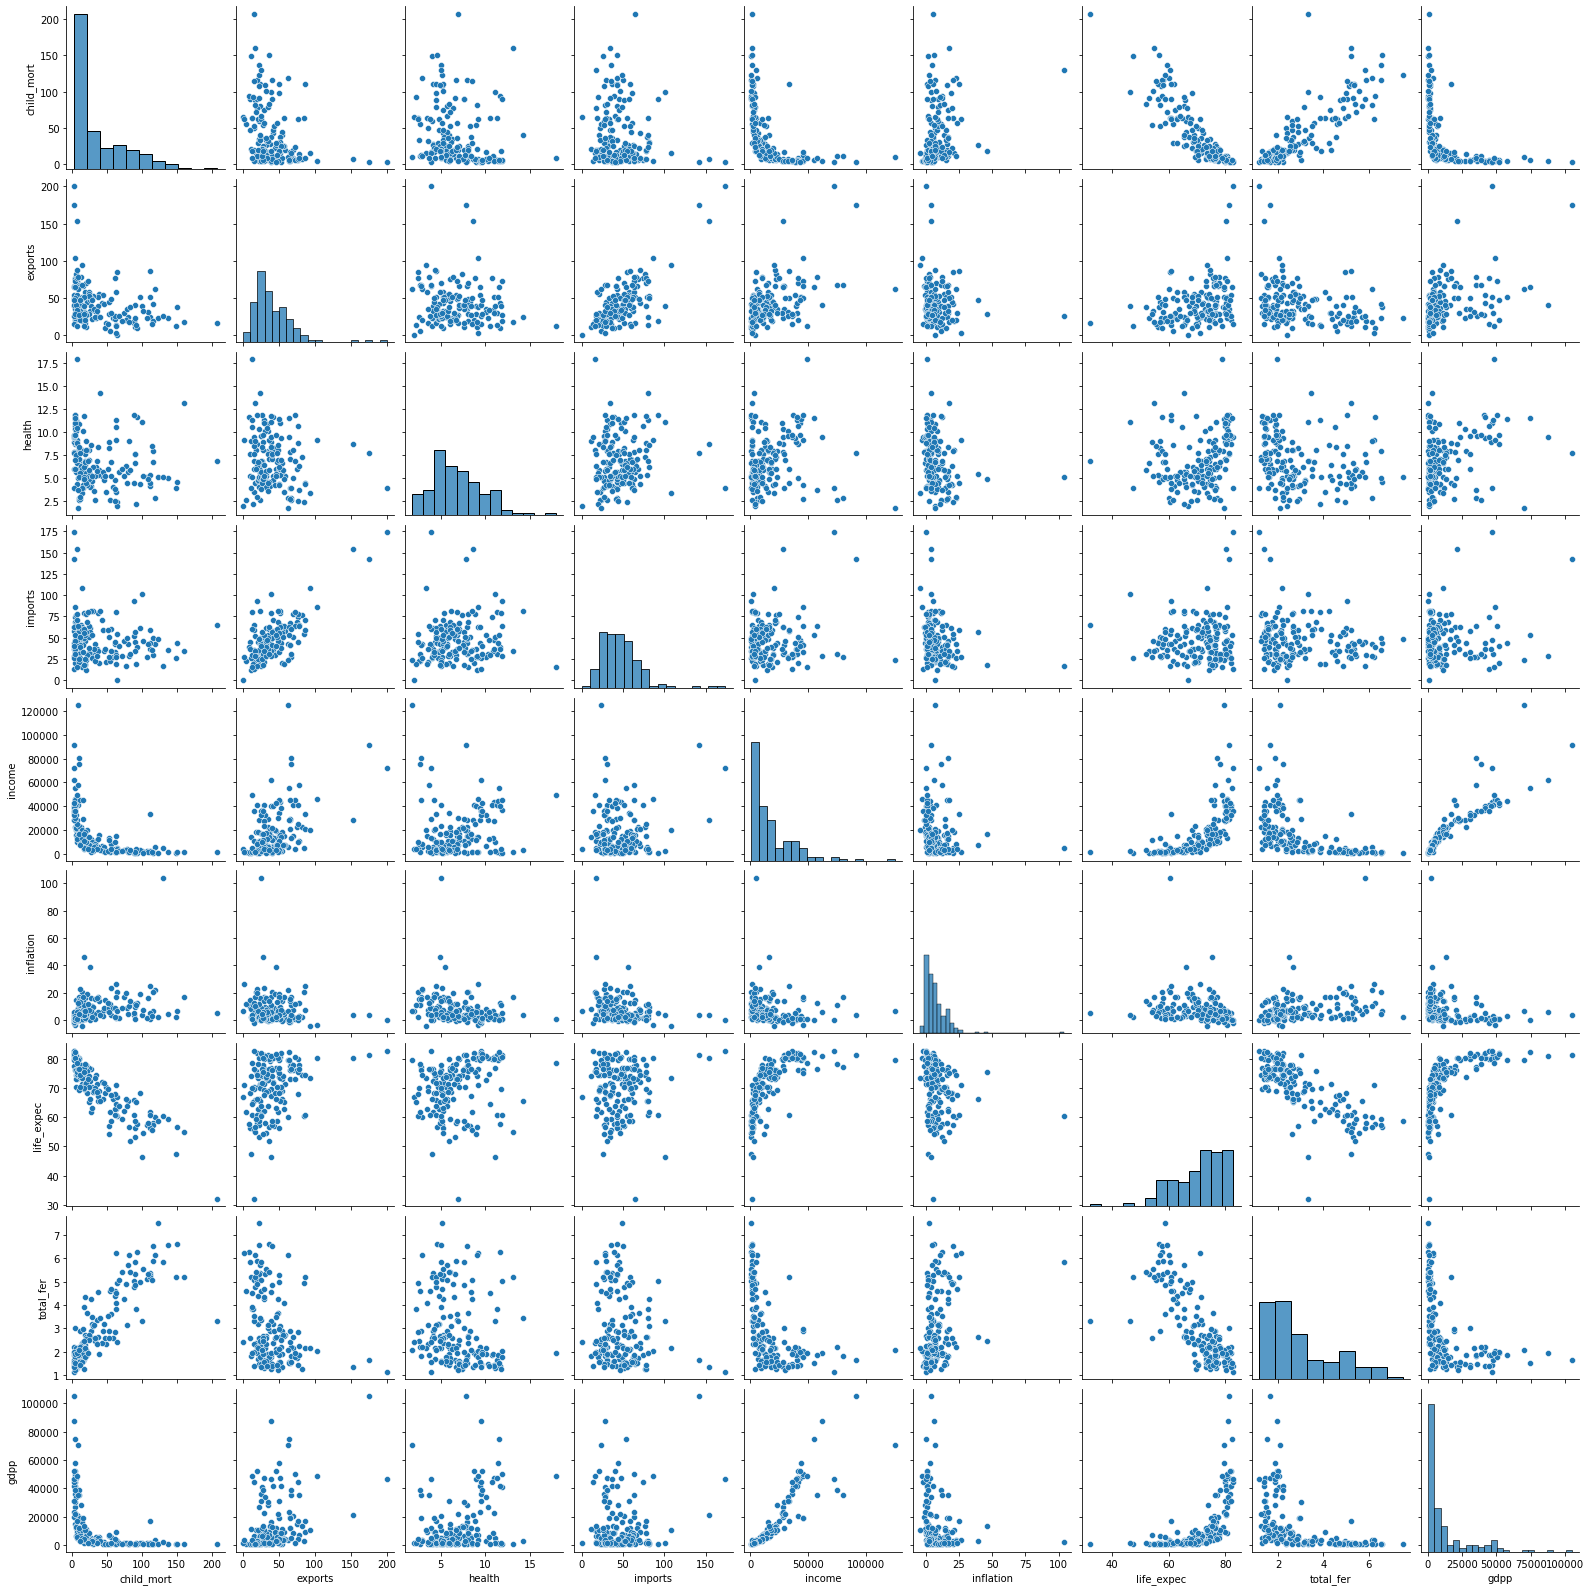

In [20]:
sns.pairplot(data[numeric])

The pairplot shows that some variables, as "income" and "child_mort" have a positive skew while "life_expec" has a left skew. There is a significant correlation between some variables, as between "total_fer" and "child_mort".

<AxesSubplot:>

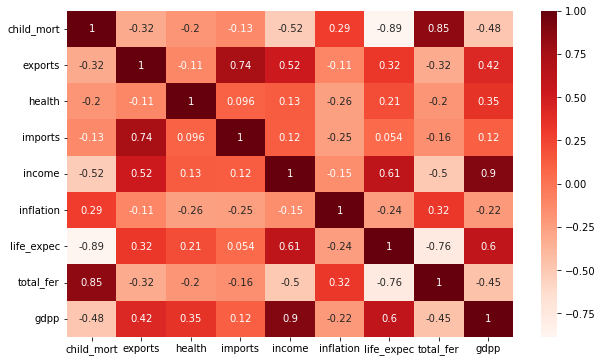

In [21]:
corr = data.corr()

fig = plt.subplots(figsize=(10,6))
sns.heatmap(corr, annot=True, fmt='.2g', cmap='Reds')

In [22]:
for x in range(corr.shape[0]):
    corr.iloc[x,x] = 0.0
    
df_corr = corr.abs().idxmax().to_frame().reset_index().rename(columns={'index': 'Var 1', 0: 'Var 2'})
df_corr['values'] = corr.abs().max().values
df_corr

Var 1       Var 2    values
0  child_mort  life_expec  0.886676
1     exports     imports  0.737381
2      health        gdpp  0.345966
3     imports     exports  0.737381
4      income        gdpp  0.895571
5   inflation   total_fer  0.316921
6  life_expec  child_mort  0.886676
7   total_fer  child_mort  0.848478
8        gdpp      income  0.895571

As shown above, there is a substantial absolute correlation between gdpp and income, and child_mort with life_expec and total_fer.

## Summary for Data Cleaning and Feature Engineering

- No action is necessary for Data Cleaning or Feature Engineering;
- Standard Scaler must be used at the model creation.

## Model Creation

First, the data will be scaled to avoid problems during the clustering process.

In [23]:
data_mod = data.set_index('country')
sc = StandardScaler()
data_mod = sc.fit_transform(data_mod)

### Agglomerative Clustering

In [24]:
# Silhouette Method
sil = []

for num_clusters in range(2,10):
    ag = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')
    ag = ag.fit(data_mod)
    print(f'Silhouette Score for {num_clusters}: {silhouette_score(data_mod, ag.labels_)}')

Silhouette Score for 2: 0.3153134331018189
Silhouette Score for 3: 0.24563001303300652
Silhouette Score for 4: 0.24811891847692066
Silhouette Score for 5: 0.2193301598939687
Silhouette Score for 6: 0.217674980548791
Silhouette Score for 7: 0.24187376443876954
Silhouette Score for 8: 0.23387000967791902
Silhouette Score for 9: 0.23713495817822783


In [25]:
# Fitting the Aglomerative Clustering with 2 cluesters
ag = AgglomerativeClustering(n_clusters=2, linkage='ward')
ag = ag.fit(data_mod)

# Appending "cluster_km" for each variable
data['cluster_ag'] = ag.labels_

In [26]:
data.groupby('cluster_ag').mean()

child_mort    exports    health    imports        income  \
cluster_ag                                                             
0            46.529323  36.660895  6.384812  46.375683   9362.127820   
1             5.961765  58.508824  8.501176  48.902941  47588.235294   

            inflation  life_expec  total_fer          gdpp  
cluster_ag                                                  
0             8.71909   68.145865   3.218797   5242.210526  
1             4.11550   79.982353   1.888529  43170.588235

In [27]:
data.cluster_ag.value_counts()

0    133
1     34
Name: cluster_ag, dtype: int64

The best Agglomerative Clustering algorithm obtained had only two clusters, with the main separation obtained in the variables "child_mort", "income" and "gdpp". Therefore, there are a larger concentration of vulnerable countries at the cluster 0, having 133 countries.

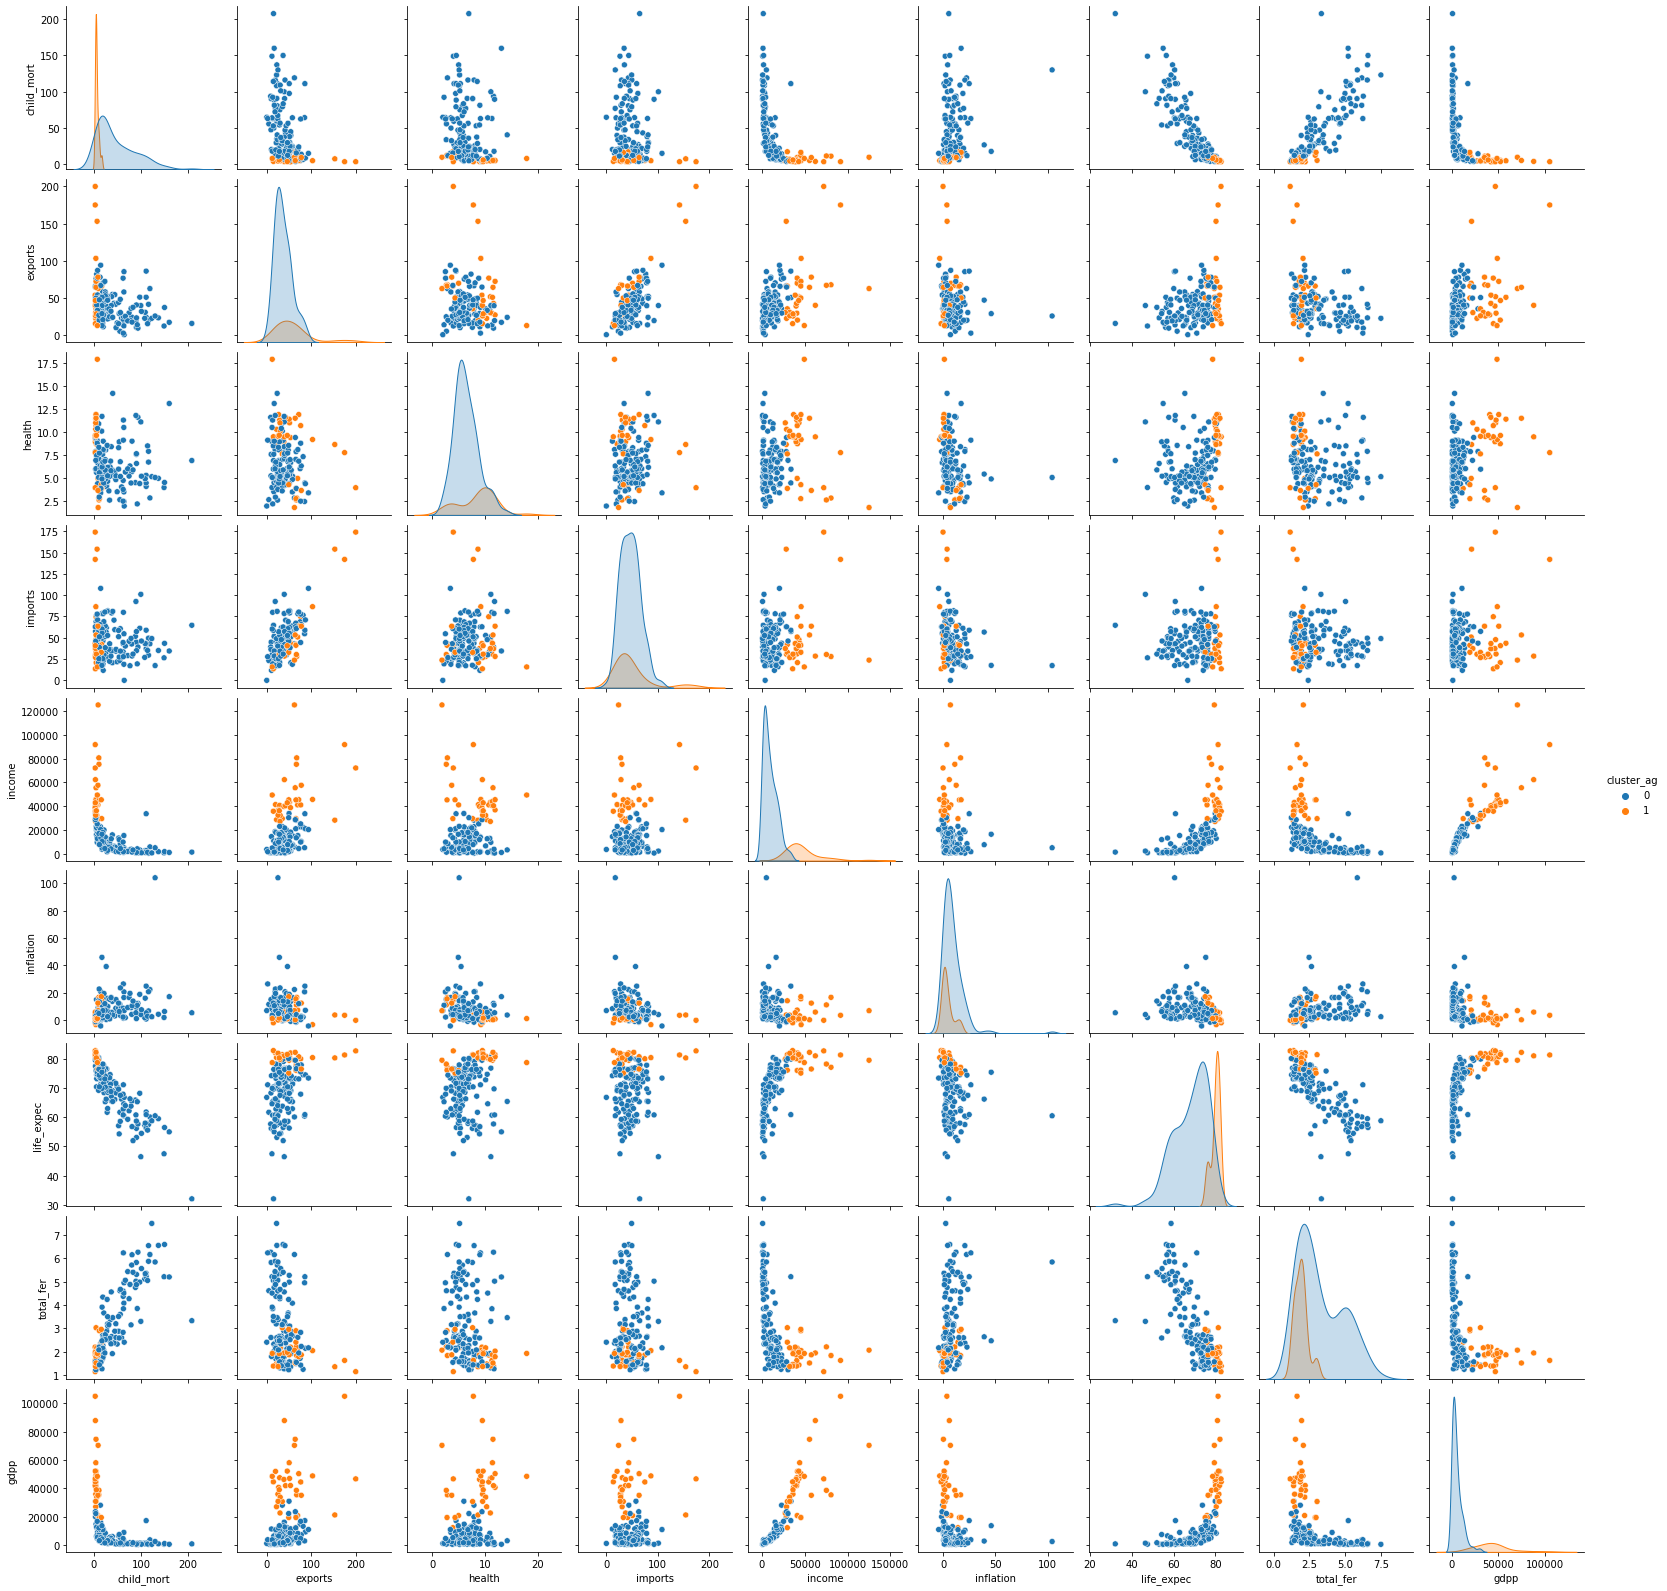

In [28]:
sns.pairplot(data,hue='cluster_ag', palette='tab10')

There is a clear difference between both clusters as shown above in most of variables. However, the large amount of vulnerable countries make it harder for a better identification of poorer countries.

### DBSCAN

In [29]:
# Silhouette Method
sil = []

for e in range(1,7):
    dbscan = DBSCAN(eps=e, min_samples=2)
    dbscan.fit(data_mod)
    print(f'Silhouette Score for {e}: {silhouette_score(data_mod, dbscan.labels_)}')

Silhouette Score for 1: -0.06803564496952415
Silhouette Score for 2: 0.45308390809406546
Silhouette Score for 3: 0.5576815439859409
Silhouette Score for 4: 0.6164732380447272
Silhouette Score for 5: 0.6303375987432929
Silhouette Score for 6: 0.6303375987432929


In [30]:
# Fitting the Aglomerative Clustering with 2 cluesters
dbscan = DBSCAN(eps=5, min_samples=2)
dbscan = dbscan.fit(data_mod)

# Appending "cluster_km" for each variable
data['cluster_dbscan'] = dbscan.labels_

In [31]:
data_dbscan = data.drop(columns='cluster_ag')
data_dbscan.groupby('cluster_dbscan').mean()

child_mort    exports    health    imports        income  \
cluster_dbscan                                                             
-1               130.00000  25.300000  5.070000  17.400000   5150.000000   
 0                37.71747  41.204211  6.826205  47.067867  17216.945783   

                 inflation  life_expec  total_fer          gdpp  
cluster_dbscan                                                   
-1              104.000000   60.500000   5.840000   2330.000000  
 0                7.202205   70.616265   2.930542  13028.216867

In [32]:
data['cluster_dbscan'].value_counts()

 0    166
-1      1
Name: cluster_dbscan, dtype: int64

The best DBSCAN algorithm couldn't identify more than one cluster, with the presence of one outlier value. Therefore, this model is not suitable for this task.

### KMeans

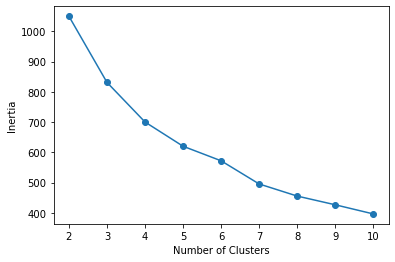

In [33]:
# Elbow Method
inertia = []
list_num_clusters = list(range(2,11))

for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters, random_state=42)
    km.fit(data_mod)
    inertia.append(km.inertia_)
    
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');

The elbow method shows that the bigger decrease of inertia happens between the clusters 3 and 7. Therefore, I will use the silhouette coefficient to obtain a better precision.

In [34]:
# Silhouette Method
sil = []

for num_clusters in range(2,8):
    km = KMeans(n_clusters=num_clusters, random_state=42)
    km.fit(data_mod)
    print(f'Silhouette Score for {num_clusters}: {silhouette_score(data_mod, km.labels_)}')

Silhouette Score for 2: 0.28735668921406704
Silhouette Score for 3: 0.28329575683463126
Silhouette Score for 4: 0.301375962376881
Silhouette Score for 5: 0.2992594995920442
Silhouette Score for 6: 0.2350698927516289
Silhouette Score for 7: 0.24905003461730515


The larger silhouette score was obtained using 4 clusters.

In [35]:
# Fitting the KMeans with 5 clusters
km = KMeans(n_clusters=4, random_state=42)
km.fit(data_mod)

# Appending "cluster_km" for each variable
data['cluster_km'] = km.labels_

In [36]:
data_km = data.drop(columns=['cluster_ag', 'cluster_dbscan'])
data_km.groupby('cluster_km').mean()

child_mort     exports    health     imports        income  \
cluster_km                                                               
0            21.389655   41.290678  6.235862   48.038689  12968.620690   
1            92.961702   29.151277  6.388511   42.323404   3942.404255   
2             4.953333   45.826667  9.168667   39.736667  45250.000000   
3             4.133333  176.000000  6.793333  156.666667  64033.333333   

            inflation  life_expec  total_fer          gdpp  
cluster_km                                                  
0            7.413460   72.935632   2.286552   6919.103448  
1           12.019681   59.187234   5.008085   1922.382979  
2            2.742200   80.376667   1.795333  43333.333333  
3            2.468000   81.433333   1.380000  57566.666667

In [37]:
data_km.cluster_km.value_counts()

0    87
1    47
2    30
3     3
Name: cluster_km, dtype: int64

All 4 clusters have clear differentiations between themselves. The poorest countries are concentrated in the cluster 1, having the least amounts of gdpp, income and inflation and having the least values of life_expec and income.

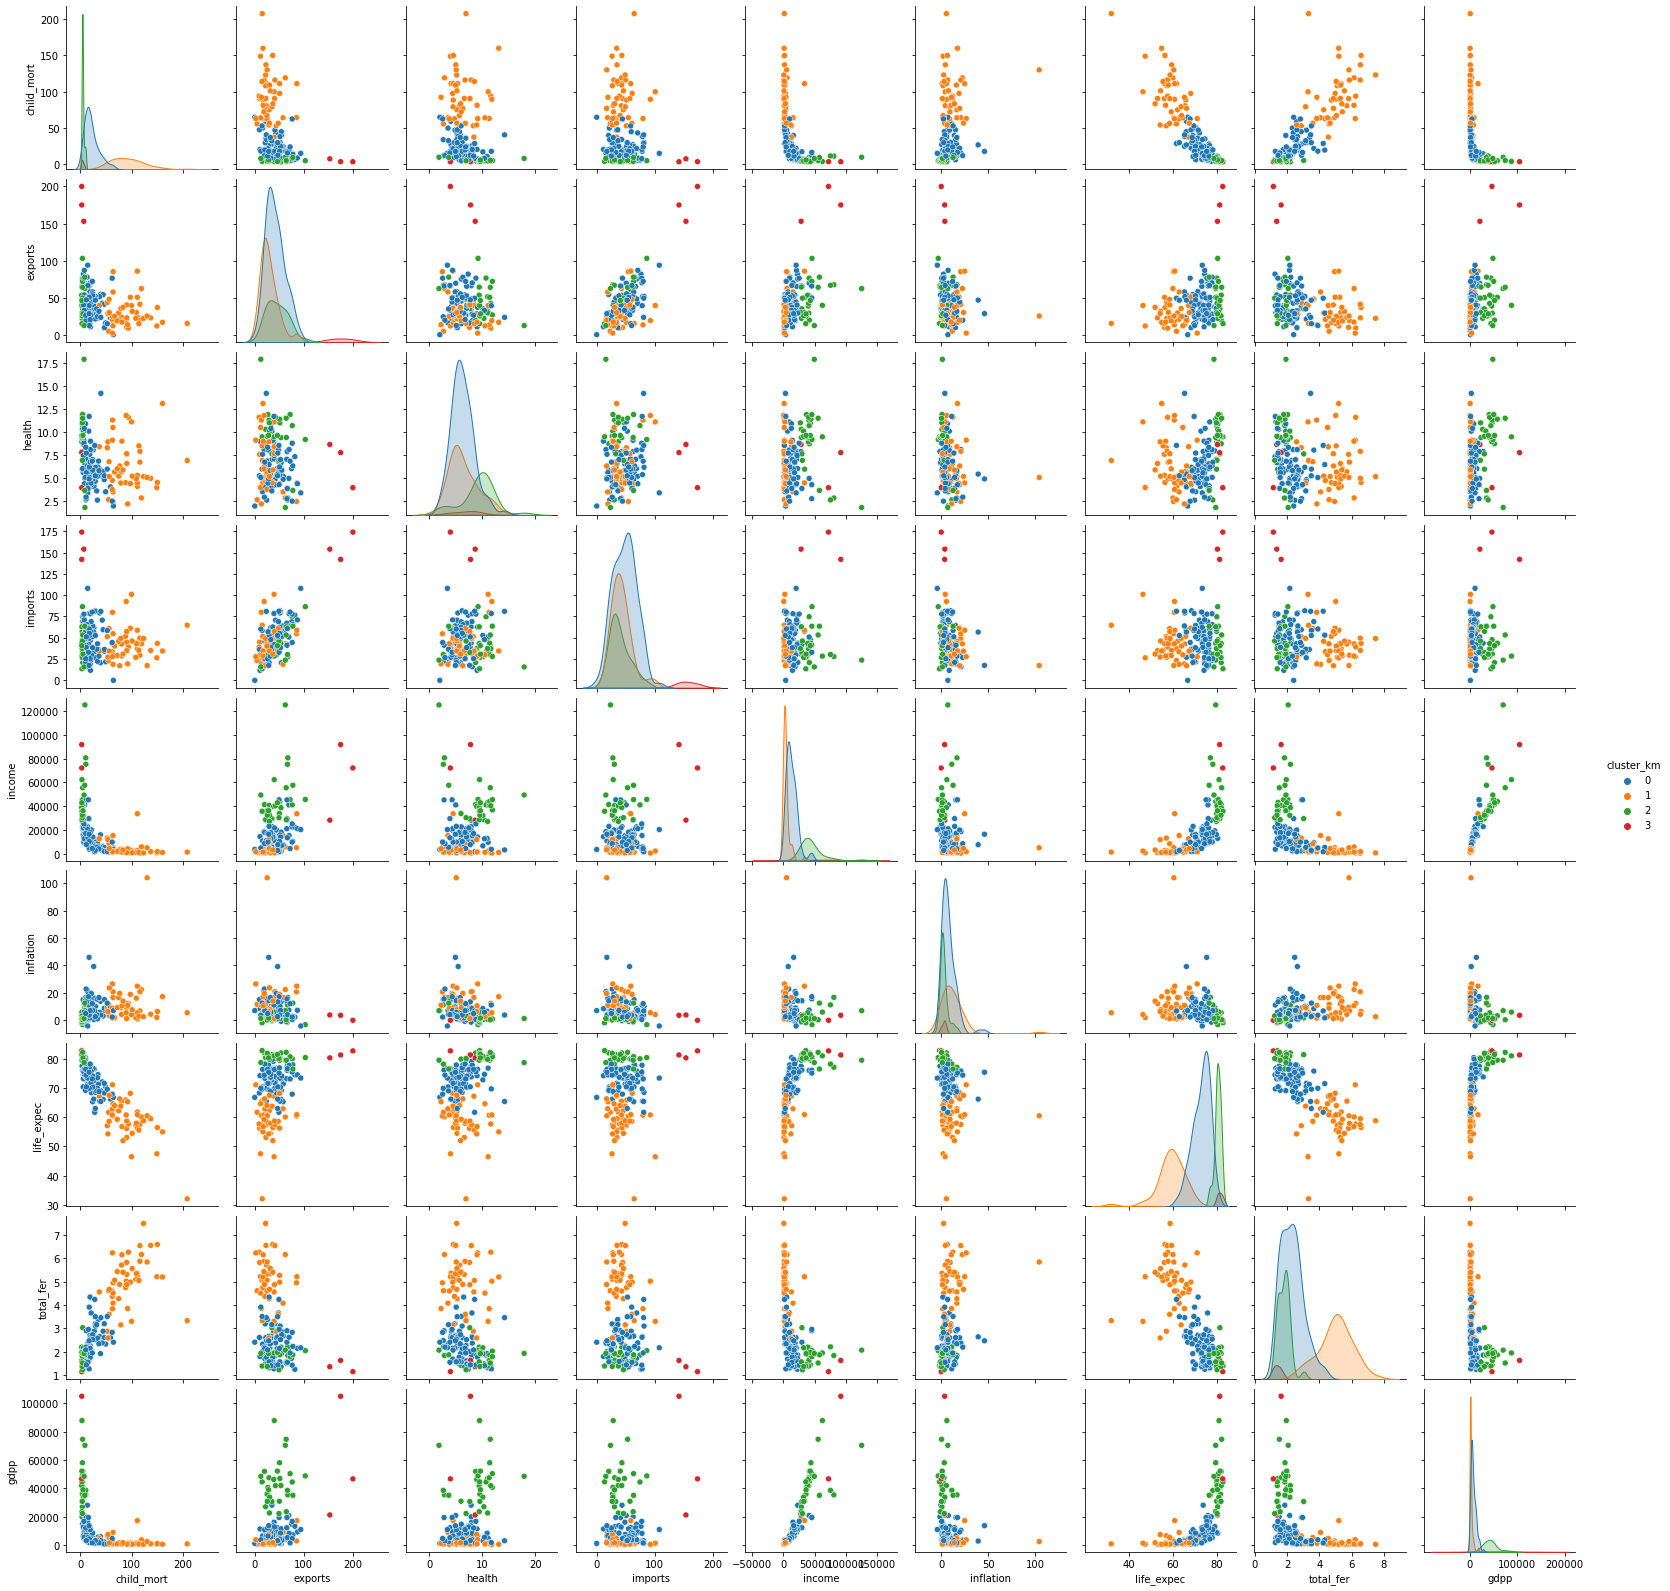

In [38]:
sns.pairplot(data_km,hue='cluster_km', palette='tab10')

The pairplot above shows some distincts differenciations between the four clusters, mainly in some variables as "imports". Therefore, the best clustering algorithm for this problem is KMeans.

In [39]:
# Changing clusters 0 and 1 for better ordenation
data["cluster_km"].replace({0: 1, 1: 0}, inplace=True)
data.groupby('cluster_km').mean().drop(columns=['cluster_ag', 'cluster_dbscan'])

child_mort     exports    health     imports        income  \
cluster_km                                                               
0            92.961702   29.151277  6.388511   42.323404   3942.404255   
1            21.389655   41.290678  6.235862   48.038689  12968.620690   
2             4.953333   45.826667  9.168667   39.736667  45250.000000   
3             4.133333  176.000000  6.793333  156.666667  64033.333333   

            inflation  life_expec  total_fer          gdpp  
cluster_km                                                  
0           12.019681   59.187234   5.008085   1922.382979  
1            7.413460   72.935632   2.286552   6919.103448  
2            2.742200   80.376667   1.795333  43333.333333  
3            2.468000   81.433333   1.380000  57566.666667

Characteristics of each cluster:

- 0: Larger children mortality and fertility, least amount spent in imports, low health quality and low values of imports. Worst life expectancy, inflation, income and GDP per capta. The poorest and most vulnerable countries.

- 1: High level of children mortality and inflation. Median values of exports and imports, with high inflation and relatively low GDPP, health, life expectancy and incomes. Countries in development, with overall low life quality but much better than the poorest countries.

- 2: Low levels of child mortality, inflation and fertility, high life expectancy, health quality, incomes and GDPP. Moderate values of exports and imports. Rich countries with high quality of life.

- 3: Least amounts of child mortality, inflation and fertility. Higher amounts of exports, imports, income, GDPP and life expectancy. Relatively low health quality. Rich countries with higher amount of global trades, however having an overall median health quality.


Therefore, the countries who most need help are those contained in cluster 0, being listed below:

In [40]:
data.query('cluster_km == 0').country.to_list()

['Afghanistan',
 'Angola',
 'Benin',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Equatorial Guinea',
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'Haiti',
 'Iraq',
 'Kenya',
 'Kiribati',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mozambique',
 'Namibia',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Rwanda',
 'Senegal',
 'Sierra Leone',
 'South Africa',
 'Sudan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Uganda',
 'Yemen',
 'Zambia']

In [41]:
fig = px.choropleth(data,
                    locationmode='country names',
                    locations='country',
                    color='cluster_km',
                    title='Countries Clusters'
                   )
fig.show()

## Conclusion

Actions taken in Data Cleaning and Feature Engineering:

- No action is necessary for Data Cleaning or Feature Engineering;
- Standard Scaler must be used at the model creation.

Model Creation Results:

- Best Agglomerative Clustering had 2 clusters;
- Best DBSCAN had only 1 cluster with 1 outlier;
- Best KMeans had 4 clusters.
- The analysis conclued that the best algorithm to separate the most needed countries was KMeans. 
- The model was able to create four distinct clusters, with the cluster denominated as "0" containing the poorest countries.
- The chart at the end of the notebook showed that the poorest countries are more concentrated in Africa and some Middle East countries, containing 47 countries.

## Next Steps

For the upcoming works, I suggest selecting the poorest countries of cluster 0 and concentrating aid in the most needed countries.